In [182]:
# Load libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [183]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
ds = pd.read_csv(url, names=names)

In [184]:
# shape
ds.shape

(150, 5)

In [185]:
# head
ds.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [186]:
# descriptions, the data needs standardization
ds.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [187]:
# standardize the dataset and transform into X,Y
object=StandardScaler()
X=object.fit_transform(ds.loc[:,ds.columns!='class'])
X_cols=ds.loc[:,ds.columns!='class'].columns
Y=ds['class']
Y_num=Y.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],value=[0,1,2])

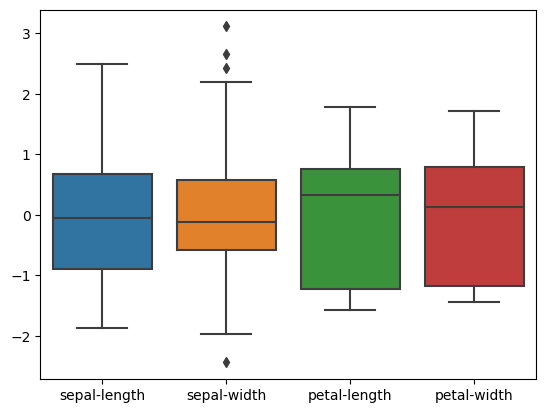

In [188]:
# EDA of the dataset, the data is standardized
sns.boxplot(data=X)
plt.xticks(np.arange(0,4,step=1), X_cols)
plt.show()

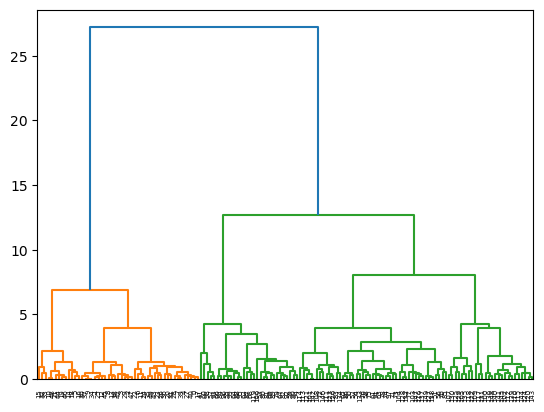

In [189]:
# in this case study my goal is to define number of clusters, given the classes are unknown
# to verify the logics I'll use the initial classes
# firstly, I'll utilize Dendrogram to define the N of clusters
z2=linkage(X,method='ward',metric='euclidean')
dn=dendrogram(z2)
plt.show()

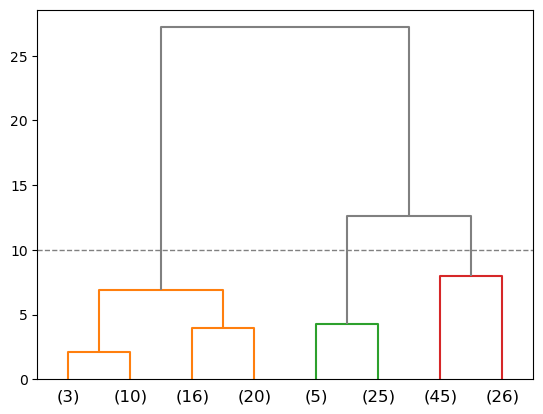

In [190]:
# I finetuned the chart to make it more clear for selecting N of clusters
# at the level of above 10 (above the grey line) there are definitely 3 clusters
z2=linkage(X,method='ward',metric='euclidean')
dn=dendrogram(z2,color_threshold=10, above_threshold_color='grey',truncate_mode = 'level',p=2)
plt.axhline(y=10, c='grey', lw=1, linestyle='dashed')
plt.show()

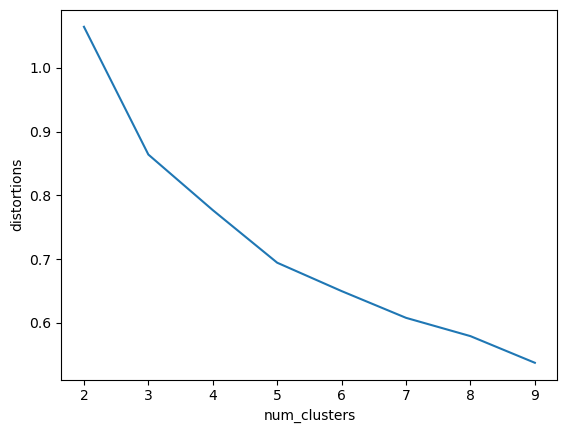

In [191]:
# the next method I'm going to utilize to define the N of clusters is the elbow plot
# showing N of clusters and distortion - the chart shows an elbow at 3 clusters
list_distortions=[]
num_clusters=range(2,10)
for i in num_clusters:
    centroids, distortion=kmeans(X,i)
    list_distortions.append(distortion)
elbow_data=pd.DataFrame({'num_clusters':num_clusters,'distortions':list_distortions})
sns.lineplot(x='num_clusters',y='distortions',data=elbow_data)
plt.show()

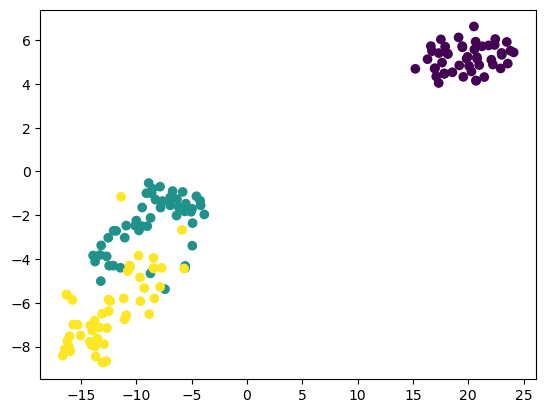

In [192]:
# now I'm going to use t-SNE to reduce 4-dimension dataset to 2D and visualize clusters
# the chart shows clearly 2 clusters, while the 3-d one is hidden
model=TSNE(learning_rate=100)
transformed=model.fit_transform(X)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=Y_num)
plt.show()

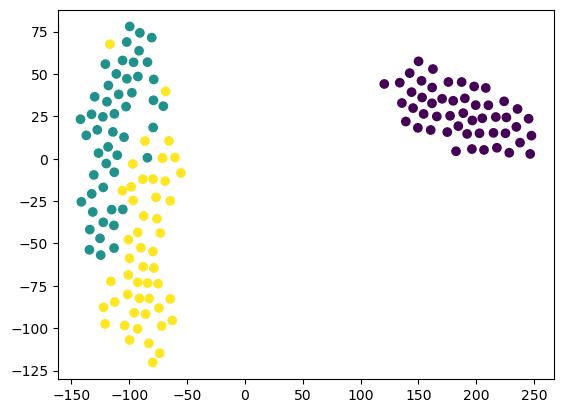

In [193]:
# finetuning t-SNE by increasing learning rate shows 3 clusters more evidently 
model=TSNE(learning_rate = 1000)
transformed=model.fit_transform(X)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=Y_num)
plt.show()

In [194]:
# finally I'll deploy PCA (Principal Component Analysis) to reduce dimension (intrinsic dimension)
# and find the optimal N of variables among ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']  
# to define clusters
model=PCA()
model.fit(X)
transformed=model.transform(X)

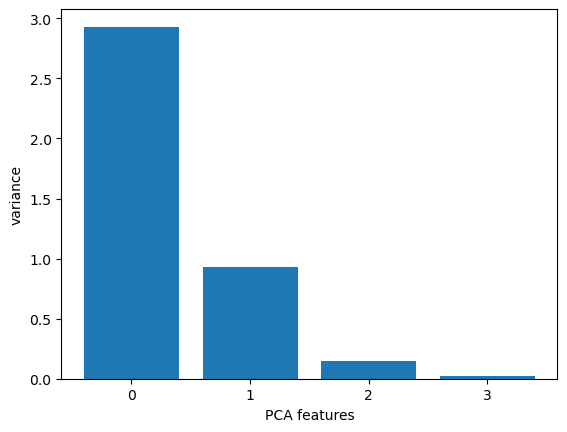

In [195]:
# high variance features are informative, while the low variance features are noise
# the chart shows that the first 2 features are the most informative for clustering
features=range(model.n_components_)
plt.bar(features,model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

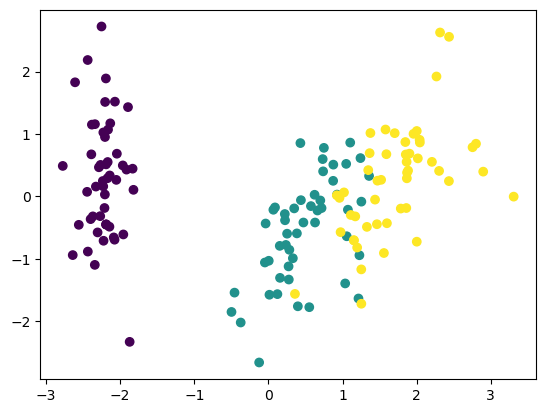

In [196]:
# retain 2 PCA features with the highest variance to visualize clusters 
# the chart gives the same info for clustering vs the chart with 4 variables
model=PCA(n_components=2)
model.fit(X)
transformed=model.transform(X)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=Y_num)
plt.show()